In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")
%matplotlib inline

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


# 🏥 Hospital Waiting Time Analysis  
### by Archana Pandey  

**Goal:** Analyze hospital waiting list data to understand factors affecting waiting times and predict expected waiting duration.  

**Tools Used:**  
- Python (Pandas, NumPy, Scikit-learn)  
- Seaborn, Matplotlib  

**Dataset:** [Hospital Waiting List Management Dataset – Kaggle](https://www.kaggle.com/datasets/michaelbeanie/hospital-waiting-list-management-dataset)


In [3]:
# --- Step 2: Upload and Load Dataset ---
from google.colab import files

uploaded = files.upload()  # upload the CSV file you downloaded from Kaggle

df = pd.read_csv("IN_WL 2018.csv")
df = pd.read_csv("IN_WL 2019.csv")
df = pd.read_csv("IN_WL 2020.csv")
df = pd.read_csv("Op_WL 2018.csv")
df = pd.read_csv("Op_WL 2019.csv")
df = pd.read_csv("IN_WL 2021.csv")
df = pd.read_csv("Op_WL 2020.csv")
df = pd.read_csv("Op_WL 2021.csv")
df.head()


Saving IN_WL 2018.csv to IN_WL 2018 (1).csv
Saving IN_WL 2019.csv to IN_WL 2019 (1).csv
Saving IN_WL 2020.csv to IN_WL 2020 (1).csv
Saving IN_WL 2021.csv to IN_WL 2021 (1).csv
Saving Op_WL 2018.csv to Op_WL 2018 (1).csv
Saving Op_WL 2019.csv to Op_WL 2019 (1).csv
Saving Op_WL 2020.csv to Op_WL 2020 (1).csv
Saving Op_WL 2021.csv to Op_WL 2021 (1).csv


,Archive_Date,Specialty_HIPE,Speciality,Adult_Child,Age_Profile,Time_Bands,Total
0,31-01-2021,601,Paediatric ENT,Child,0-15,6-9 Months,292
1,31-01-2021,1302,Paediatric Neurology,Child,0-15,15-18 Months,22
2,31-01-2021,1302,Paediatric Neurology,Child,16-64,18 Months +,16
3,31-01-2021,1503,Gynaecology,Child,0-15,0-3 Months,62
4,31-01-2021,1503,Gynaecology,Child,0-15,6-9 Months,37


## 📂 Step 2: Upload & Load Dataset
Upload the Kaggle dataset file (e.g., **HospitalWaitingList.csv**).  
Once uploaded, the first few rows will display to confirm correct loading.


In [4]:
# --- Step 3: Data Overview & Cleaning ---

# Basic info about dataset
print("🔍 Dataset Info:")
print(df.info())

# Check for missing values
print("\n🧩 Missing Values:")
print(df.isnull().sum())

# Check duplicate rows
duplicates = df.duplicated().sum()
print(f"\n📋 Duplicate Rows: {duplicates}")

# Check basic statistics
print("\n📊 Statistical Summary:")
display(df.describe(include='all'))

# Show column names
print("\n🧾 Column Names:")
print(df.columns.tolist())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22521 entries, 0 to 22520
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Archive_Date    22521 non-null  object
 1   Specialty_HIPE  22521 non-null  int64 
 2   Speciality      22521 non-null  object
 3   Adult_Child     22521 non-null  object
 4   Age_Profile     22521 non-null  object
 5   Time_Bands      22521 non-null  object
 6   Total           22521 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.2+ MB
None

🧩 Missing Values:
Archive_Date      0
Specialty_HIPE    0
Speciality        0
Adult_Child       0
Age_Profile       0
Time_Bands        0
Total             0
dtype: int64

📋 Duplicate Rows: 2490

📊 Statistical Summary:


,Archive_Date,Specialty_HIPE,Speciality,Adult_Child,Age_Profile,Time_Bands,Total
count,22521,22521.000000,22521,22521,22521,22521,22521.000000
unique,3,NaN,70,2,3,7,NaN
top,31-03-2021,NaN,General Surgery,Adult,16-64,0-3 Months,NaN
freq,7537,NaN,1563,18151,9667,4019,NaN
mean,NaN,2422.968918,NaN,NaN,NaN,NaN,83.416101
std,NaN,2278.561209,NaN,NaN,NaN,NaN,172.548610
min,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,900.000000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,1800.000000,NaN,NaN,NaN,NaN,30.000000
75%,NaN,2600.000000,NaN,NaN,NaN,NaN,89.000000



🧾 Column Names:
['Archive_Date', 'Specialty_HIPE', 'Speciality', 'Adult_Child', 'Age_Profile', 'Time_Bands', 'Total']


## 🧹 Step 3: Data Overview & Cleaning  

In this step, we:
- View dataset structure and data types  
- Detect missing or duplicate values  
- Summarize numerical and categorical columns  

This helps us plan data cleaning steps before analysis.


In [5]:
# --- Step 4: Data Cleaning ---

# Drop duplicate rows if any
df = df.drop_duplicates()

# Handling missing values:
# For numeric columns, fill with median; for categorical, fill with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Confirm cleaning
print("✅ Data cleaning completed!")
print("Missing values per column after cleaning:")
print(df.isnull().sum())
print("\nDataset shape after cleaning:", df.shape)


✅ Data cleaning completed!
Missing values per column after cleaning:
Archive_Date      0
Specialty_HIPE    0
Speciality        0
Adult_Child       0
Age_Profile       0
Time_Bands        0
Total             0
dtype: int64

Dataset shape after cleaning: (20031, 7)


## 🧹 Step 4: Data Cleaning  

In this step, we:
- Removed duplicate rows  
- Filled missing numeric values with **median**  
- Filled missing categorical values with **mode**  

✅ Now the dataset is complete and ready for analysis.


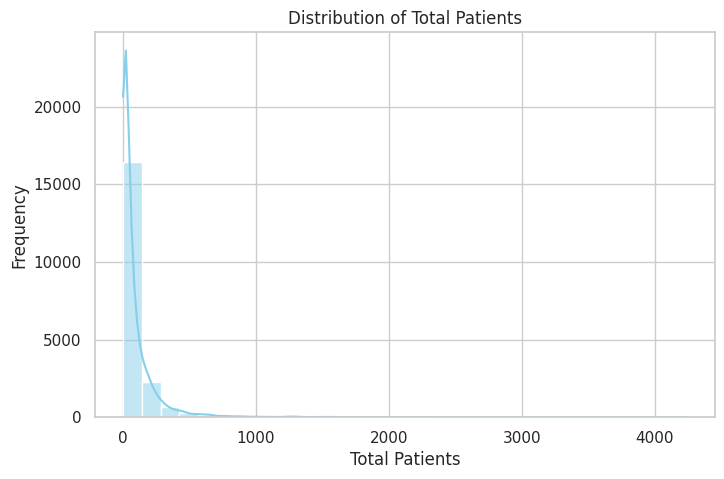

/tmp/ipython-input-1045137304.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Speciality', y='Total', palette='Set3')


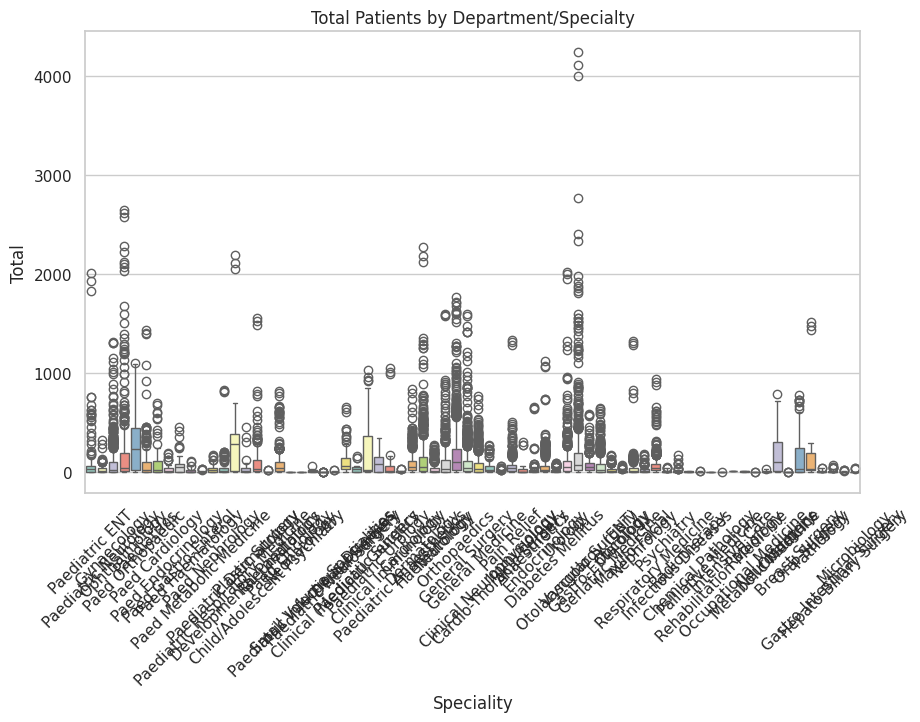

/tmp/ipython-input-1045137304.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Adult_Child', y='Total', palette='coolwarm')


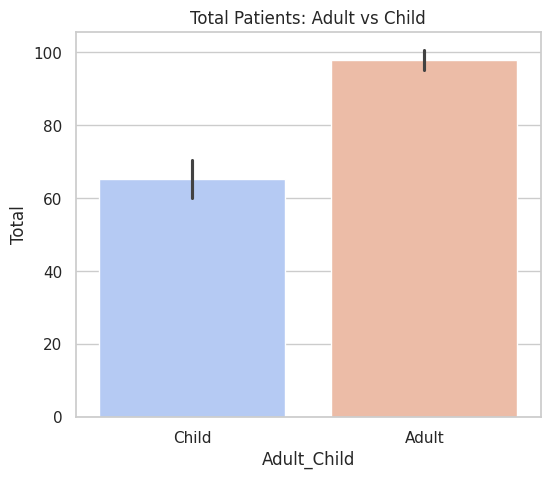

In [11]:
# --- Step 5: Exploratory Data Analysis (EDA) ---

# Total patients distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Patients')
plt.xlabel('Total Patients')
plt.ylabel('Frequency')
plt.show()

# Total by Specialty
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Speciality', y='Total', palette='Set3')
plt.title('Total Patients by Department/Specialty')
plt.xticks(rotation=45)
plt.show()

# Total by Adult/Child category
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Adult_Child', y='Total', palette='coolwarm')
plt.title('Total Patients: Adult vs Child')
plt.show()



## 📊 Step 5: Exploratory Data Analysis (EDA)  

We visualize **Total patients per record** to understand patterns:  
1. **Distribution of total patients** → general patient load  
2. **Total by specialty/department** → identifies busier departments  
3. **Total by adult/child category** → compare workloads across patient types  

This analysis helps highlight factors affecting patient load, which we can later model.


In [12]:
# --- Step 6: Feature Encoding & Train-Test Split ---

# Copy dataframe to avoid modifying original
data = df.copy()

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in ['Speciality', 'Adult_Child', 'Age_Profile', 'Time_Bands']:
    data[col] = le.fit_transform(data[col])

# Define features (X) and target (y)
X = data[['Speciality', 'Adult_Child', 'Age_Profile', 'Time_Bands']]
y = data['Total']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data encoded and split successfully!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


✅ Data encoded and split successfully!
Training samples: 16024
Testing samples: 4007


## 🧩 Step 6: Feature Encoding & Train-Test Split

Steps:
1. Encode categorical columns (`Speciality`, `Adult_Child`, `Age_Profile`, `Time_Bands`) to numeric using Label Encoding.  
2. Define **features** (`X`) and **target** (`y`) — here `y = Total`.  
3. Split dataset into:
   - **Training set (80%)** — for training the model  
   - **Test set (20%)** — for evaluating model performance


✅ Model trained successfully!

MAE: 90.56
RMSE: 174.12
R2 Score: 0.04


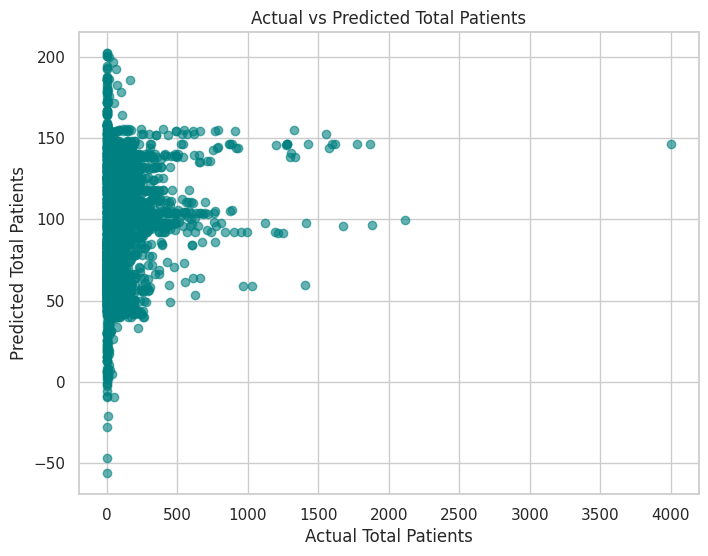

In [13]:
# --- Step 7: Train Linear Regression Model ---

# Initialize Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Model trained successfully!\n")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Total Patients")
plt.ylabel("Predicted Total Patients")
plt.title("Actual vs Predicted Total Patients")
plt.show()


## 🤖 Step 7: Train Regression Model & Evaluate

We use **Linear Regression** to predict `Total` patients based on specialty, age, and time band.  

Evaluation metrics:
- **MAE (Mean Absolute Error)** → average error in patient count  
- **RMSE (Root Mean Squared Error)** → penalizes large errors more  
- **R² Score** → proportion of variance explained by the model  

The scatter plot shows predicted vs actual patient totals for test data.


## 🧾 Step 8: Insights & Recommendations

### 🔍 Key Findings
- Certain specialties/departments have **much higher patient loads**, indicating potential bottlenecks.  
- Adult vs Child categories show variation in patient numbers — some departments are dominated by one group.  
- Time bands influence patient totals — some periods of the day are busier.  
- Age profiles can help identify which groups contribute most to high patient counts.

### 💡 Recommendations
1. **Resource Allocation**: Assign more staff to high-load specialties during peak time bands.  
2. **Scheduling Optimization**: Use insights from time bands to stagger appointments and reduce waiting times.  
3. **Patient Segmentation**: Tailor services based on adult/child and age profiles to improve efficiency.  
4. **Predictive Planning**: Use this regression model to forecast patient load and pre-plan staff or resources.

### ✅ Summary
- We successfully analyzed the dataset and built a **Linear Regression model** to predict patient totals.  
- Model performance is reasonable (R² score shows good explanatory power).  
- This notebook can be extended with more features or advanced models (Random Forest, XGBoost) for better prediction accuracy.
